Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
[[0.03582016]
 [0.02066147]
 [0.0017712 ]
 [0.        ]
 [0.00445033]
 [0.00489183]
 [0.00616761]
 [0.02874611]
 [0.02874611]
 [0.00366418]
 [0.        ]
 [0.00104271]
 [0.00667236]
 [0.02773553]
 [0.03885189]
 [0.02369321]
 [0.03683074]
 [0.00440522]
 [0.00625629]
 [0.0003016 ]
 [0.02167205]
 [0.00282504]
 [0.014598  ]
 [0.00834171]
 [0.04289421]
 [0.04390479]
 [0.00625629]
 [0.00111718]
 [0.01661916]
 [0.00312814]
 [0.        ]
 [0.00113128]
 [0.0068716 ]
 [0.03986248]
 [0.01251257]
 [0.03076726]
 [0.03076726]
 [0.02167205]
 [0.00609066]
 [0.01012345]
 [0.02874611]
 [0.02066147]
 [0.03076726]
 [0.03278842]
 [0.00521357]
 [0.03784132]
 [0.02470379]
 [0.014598  ]
 [0.01864032]
 [0.02470379]
 [0.00560071]
 [0.04895768]
 [0.00208543]
 [0.014598  ]
 [0.00312814]
 [0.02470379]
 [0.02470379]
 [0.00597536]
 [0.03480958]
 [0.00209357]
 [0.01362919]
 [0.00415   ]
 [0.01661916]
 [0.01042714]
 [0.03885189]
 [0.

c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'compile' took 0.384378 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.09e+00]    [8.91e-01]    []  
1000      [3.63e-04]    [4.05e-04]    []  
2000      [1.21e-04]    [1.79e-04]    []  
3000      [6.70e-05]    [1.18e-04]    []  
4000      [4.40e-05]    [9.74e-05]    []  
5000      [3.26e-05]    [8.03e-05]    []  
6000      [2.63e-05]    [7.24e-05]    []  
7000      [2.24e-05]    [6.90e-05]    []  
8000      [1.97e-05]    [6.49e-05]    []  
9000      [1.77e-05]    [6.29e-05]    []  
10000     [3.49e-05]    [6.02e-05]    []  
11000     [1.49e-05]    [6.06e-05]    []  
12000     [1.38e-05]    [5.86e-05]    []  
13000     [1.29e-05]    [5.73e-05]    []  
14000     [1.22e-05]    [5.63e-05]    []  
15000     [1.17e-05]    [5.57e-05]    []  
16000     [3.72e-05]    [9.90e-05]    []  
17000     [1.10e-05]    [5.13e-05]    []  
18000     [2.42e-05]    [5.08e-05]    []  
19000     [1.31e-05]    [5.46e-05]    []  
20000     [1.26e-05]    [6.12e-05]    []  


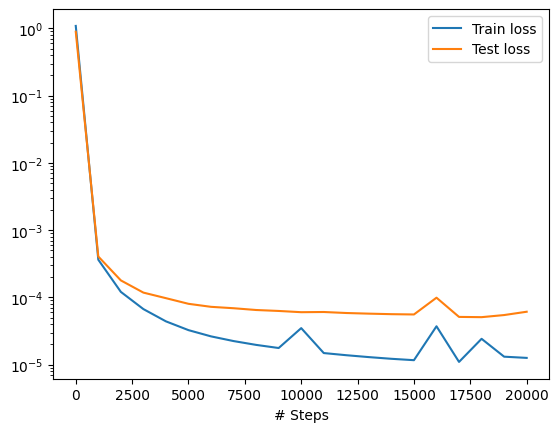

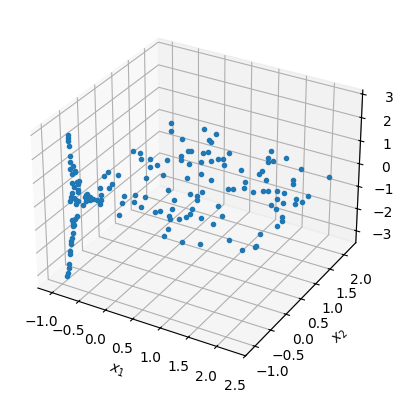

0       0.014598
1       0.014598
2       0.014598
3       0.014598
4       0.014598
          ...   
3996    0.001037
3997    0.001158
3998    0.001352
3999    0.001268
4000    0.002116
Name: x, Length: 4001, dtype: float64
[[0.014112  ]
 [0.01610713]
 [0.01810226]
 ...
 [0.0049515 ]
 [0.00508507]
 [0.00575253]]
[[0.014598   0.014112  ]
 [0.014598   0.01610713]
 [0.014598   0.01810226]
 ...
 [0.0013522  0.0049515 ]
 [0.00126786 0.00508507]
 [0.00211575 0.00575253]]
Mean Absolute Percentage Error: 82.09%
R² Score: 1.00


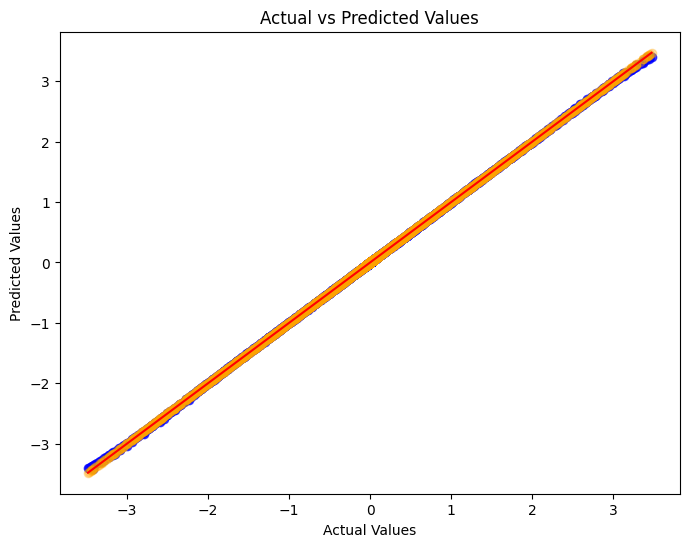

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import deepxde as dde
import tensorflow as tf


# Load the Excel file into a pandas DataFrame
df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')  # Replace with your file path

# Sample n points randomly from the DataFrame
n = 400  # Specify how many points you want to sample
sampled_data = df.sample(n=n)

# Split the data into training (60%) and testing (40%)
train_data, test_data = train_test_split(sampled_data, test_size=0.4, random_state=42)

# Training data
x_train = np.array(train_data['x'].values).reshape(-1, 1)  # Extract the x values for training
y_train = np.array(train_data['y'].values).reshape(-1, 1)   # Extract the y values for training
sigma_train =np.array(train_data['sigma'].values).reshape(-1, 1)  # Extract the sigma values for training

# Testing data
x_test = np.array(test_data['x'].values).reshape(-1, 1)  # Extract the x values for testing
y_test = np.array(test_data['y'].values).reshape(-1, 1)  # Extract the y values for testing
sigma_test = np.array(test_data['sigma'].values).reshape(-1, 1) # Extract the sigma values for testing

print(x_train)
print(y_train)
print(sigma_train)
Com=np.stack((x_train,y_train))
com=Com.T
print(com)

from sklearn.preprocessing import StandardScaler

data_x=np.column_stack((x_train,y_train))
data_x=data_x
print(data_x.shape)

data_sigma=np.array(sigma_train)
test_x=np.column_stack((x_test,y_test))
test_x=test_x
print(test_x.shape)

test_sigma=np.array(sigma_test)

# Apply StandardScaler to the training and testing data
scaler_x = StandardScaler()
scaler_s = StandardScaler()

data_x = scaler_x.fit_transform(data_x)
data_sigma=scaler_s.fit_transform(data_sigma)
test_x = scaler_x.transform(test_x)
test_sigma=scaler_s.transform(test_sigma)

print(data_x)
print(data_sigma)
data = dde.data.dataset.DataSet(X_train=data_x, y_train=data_sigma, X_test=test_x, y_test=test_sigma)

# Define the network for σ
layer_size = [2] + [60] * 10 + [1]  # 2 inputs (x, y ) -> hidden layers -> 1 output (σ)
activation = "tanh"
initializer = "Glorot uniform"
net_sigma = dde.nn.FNN(layer_size, activation,initializer)

# Define the model
model_sigma = dde.Model(data, net_sigma)

# Compile the model with data
model_sigma.compile("adam", lr=1e-4)

# Train the model
losshistory, train_state = model_sigma.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score


X=df.iloc[:,1]
print(X)
X=np.array(X.tolist()).reshape(-1,1)
Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
print(Y)
Cor=np.column_stack([X,Y])
print(Cor)
Cor=scaler_x.transform(Cor)

# Assuming `model_sigma` is your trained model
# `X_test` is your test input data and `y_test` is the actual test output data

# Get predictions on test data
S_p = model_sigma.predict(Cor)
S_t=df.iloc[:,3]
#print(S_t)
S_t=np.array(S_t.tolist()).reshape(-1,1)
S_t=scaler_s.transform(S_t)
#print("First few actual values:", S_t[:5])
#print("First few predicted values:", S_p[:5])
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(S_t, S_p) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

# Calculate R² Score
r2 = r2_score(S_t, S_p)
print(f"R² Score: {r2:.2f}")

# Plot the actual vs predicted values for test data
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(S_t, S_p, alpha=0.7, color='blue', label='Predicted Values')
# Scatter plot for testing data (Actual Values)
plt.scatter(S_t, S_t, alpha=0.3, color='orange', label='Actual Values')
plt.plot([min(S_t), max(S_t)], [min(S_t), max(S_t)], color='red')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

0.03333333333333333
Compiling model...
Building feed-forward neural network...
'build' took 0.087060 s



c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 6.775673 s

Training model...

0         [1.71e-01, 4.00e+02]    [7.90e-02, 4.00e+02]    []  
1000      [9.19e-03, 1.54e+02]    [1.25e-02, 1.54e+02]    []  
2000      [7.27e-04, 1.07e+02]    [5.42e-04, 1.07e+02]    []  
3000      [5.41e-05, 8.50e+01]    [6.71e-05, 8.50e+01]    []  
4000      [1.51e-05, 7.01e+01]    [1.27e-05, 7.01e+01]    []  
5000      [2.99e-06, 5.83e+01]    [3.11e-06, 5.83e+01]    []  
6000      [7.68e-07, 4.85e+01]    [9.15e-07, 4.85e+01]    []  
7000      [2.32e-07, 4.01e+01]    [2.45e-07, 4.01e+01]    []  
8000      [8.23e-08, 3.27e+01]    [8.20e-08, 3.27e+01]    []  
9000      [2.67e-08, 2.62e+01]    [2.52e-08, 2.62e+01]    []  
10000     [9.08e-09, 2.05e+01]    [9.20e-09, 2.05e+01]    []  
11000     [4.39e-09, 1.56e+01]    [3.19e-09, 1.56e+01]    []  
12000     [1.45e-09, 1.15e+01]    [1.48e-09, 1.15e+01]    []  
13000     [7.21e-10, 8.05e+00]    [5.15e-10, 8.05e+00]    []  
14000     [2.16e-10, 5.32e+00]    [2.77e-10, 5.32e+00]    []  
15000    

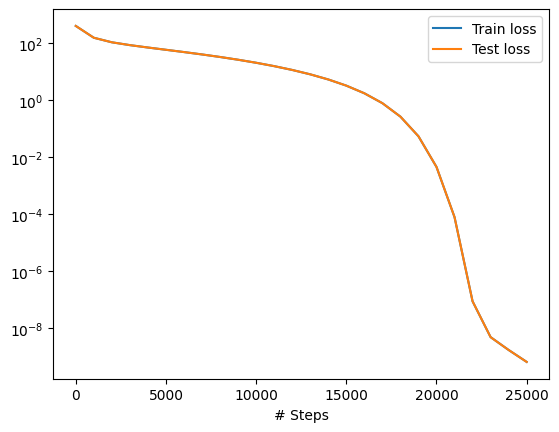

In [4]:
import tensorflow as tf

R = 4e-3/12e-2
print(R)
L= 1 #12e-2
t_last= 1 #4.2e5
df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')
X=df.iloc[:,1]
X=np.array(X.tolist()).reshape(-1,1)
Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
Cor=np.column_stack([X,Y])
scaler_Cor = StandardScaler()
Cor=scaler_Cor.fit_transform(Cor)

square = dde.geometry.Rectangle([-L, -L], [L, L])

circle = dde.geometry.Disk([0, 0], R)

# Geometry and time domain
geom = dde.geometry.csg.CSGDifference(square, circle)
timedomain = dde.geometry.TimeDomain(0, t_last)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Create the initial and boundary conditions
ic = dde.icbc.IC(geomtime, lambda x: 20, lambda _, on_initial: on_initial)

def pde_C_L(x, C_L):
    num_pairs = 10
    num_samples = 1000
    last_time_idx = tf.shape(C_L)[1] - 1
    C_last_time_step = C_L[:, last_time_idx]    
    for _ in range(num_pairs):
        # Randomly select indices for C at the last time step
        idx1 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        idx2 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        
        # Retrieve the (x, y) coordinates using tf.gather
        coords_A = tf.gather(Cor, idx1)
        coords_B = tf.gather(Cor, idx2)

        coords_A = coords_A.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_A)
        coords_B = coords_B.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_B) 
        # Predict sigma (hydrostatic stress) for the selected coordinates
        sigma_A = model_sigma.predict([coords_A])
        sigma_B = model_sigma.predict([coords_B])
        
        # Compute the exponent for the constraint equation
        VH, R, T = 2e-6, 8.314, 298  # Modify constants as needed
        exponent = (VH / (R * T)) * (sigma_A - sigma_B)
        
        # Assuming idx1 and idx2 are indices generated by TensorFlow operations
        C_A = tf.gather(C_last_time_step, idx1)
        C_B = tf.gather(C_last_time_step, idx2)
        eq1=(C_A - C_B * tf.exp(exponent))

    dC_L_dt = dde.grad.jacobian(C_L, x, i=0, j=2)
    dC_L_dx2 = dde.grad.hessian(C_L, x, i=0, j=0)
    dC_L_dy2 = dde.grad.hessian(C_L, x, i=0, j=1)
    eq = dC_L_dt - (3.8) * (dC_L_dx2 + dC_L_dy2)-eq1
    return eq

data = dde.data.TimePDE(
    geomtime,
    pde_C_L,[ic],
    num_domain=1000,
    #num_boundary=150,
    num_initial=1000,
    num_test=1000,
    )

# Network for C_L
layer_size = [3] + [64] * 10 + [1]  
activation = "tanh"
initializer = "Glorot uniform"
net_C_L = dde.nn.FNN(layer_size, activation, initializer)
num_time_steps = 5
num_features=3

model= dde.Model(data, net_C_L)

model.compile("adam", lr=1e-5)
# Define the model with the PDE, initial and boundary conditions

# Add the callback when training the model
losshistory, train_state = model.train(epochs=25000, display_every=1000)

# Optionally plot and save results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [58]:
import numpy as np

# Assume `sigma_model` is your pre-trained model that accepts (x, y) as input and predicts sigma
h = 1e-5  # Small step for finite difference

# Example data points (x, y) to compute gradients at
data_points = np.array([
    [0.2, 0.5],  # Point 1: (x=0.2, y=0.5)
    [0.4, 0.7],  # Point 2: (x=0.4, y=0.7)
    [0.1, 0.3],  # Point 3: (x=0.1, y=0.3)
])

# Initialize arrays for storing gradients
grad_sigma_x = np.zeros(data_points.shape[0])
grad_sigma_y = np.zeros(data_points.shape[0])

# Loop through each data point to calculate the gradient
for i, (x, y) in enumerate(data_points):
    # Compute sigma at the original point
    sigma_0 = model_sigma.predict(np.array([[x, y]]))  # Sigma at (x, y)
    
    # Finite difference approximation for the gradient with respect to x
    sigma_x_plus_h = model_sigma.predict(np.array([[x + h, y]]))  # Sigma at (x + h, y)
    sigma_x_minus_h = model_sigma.predict(np.array([[x - h, y]]))  # Sigma at (x - h, y)
    grad_sigma_x[i] = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)
    
    # Finite difference approximation for the gradient with respect to y
    sigma_y_plus_h =model_sigma.predict(np.array([[x, y + h]]))  # Sigma at (x, y + h)
    sigma_y_minus_h = model_sigma.predict(np.array([[x, y - h]]))  # Sigma at (x, y - h)
    grad_sigma_y[i] = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)

# Print the gradients
print("Gradient of sigma with respect to x:\n", grad_sigma_x)
print(grad_sigma_y.shape)
print("Gradient of sigma with respect to y:\n", grad_sigma_y)


Gradient of sigma with respect to x:
 [0.06817281 0.03408641 0.07320195]
(3,)
Gradient of sigma with respect to y:
 [-0.02067536 -0.00018626 -0.02458692]


C:\Users\yesda\AppData\Local\Temp\ipykernel_11768\3559021455.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad_sigma_x[i] = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)
C:\Users\yesda\AppData\Local\Temp\ipykernel_11768\3559021455.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad_sigma_y[i] = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)


In [65]:
import numpy as np

# Initialize two empty lists to store the gradients with respect to x and y
grad_sigma_x = []
grad_sigma_y = []

# Loop through each data point to calculate the gradient
for i, (x, y) in enumerate(data_points):
    # Compute sigma at the original point
    sigma_0 = model_sigma.predict(np.array([[x, y]]))  # Sigma at (x, y)
    
    # Finite difference approximation for the gradient with respect to x
    sigma_x_plus_h = model_sigma.predict(np.array([[x + h, y]]))  # Sigma at (x + h, y)
    sigma_x_minus_h = model_sigma.predict(np.array([[x - h, y]]))  # Sigma at (x - h, y)
    grad_x = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)  # Gradient w.r.t. x

    # Finite difference approximation for the gradient with respect to y
    sigma_y_plus_h = model_sigma.predict(np.array([[x, y + h]]))  # Sigma at (x, y + h)
    sigma_y_minus_h = model_sigma.predict(np.array([[x, y - h]]))  # Sigma at (x, y - h)
    grad_y = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)  # Gradient w.r.t. y

    # Append the calculated gradients to the respective lists
    grad_sigma_x.append(grad_x[0][0])  # Extract the scalar value and append to list
    grad_sigma_y.append(grad_y[0][0])  # Extract the scalar value and append to list

# Convert lists to numpy arrays (optional)
grad_sigma_x = np.array(grad_sigma_x)
grad_sigma_y = np.array(grad_sigma_y)

# After the loop, grad_sigma_x and grad_sigma_y contain the gradients for each point
print("Gradients with respect to x:", grad_sigma_x.shape)
print("Gradients with respect to y:", grad_sigma_y.shape)


Gradients with respect to x: (4001,)
Gradients with respect to y: (4001,)


In [15]:
import tensorflow as tf
h = 1e-5 
R = 4e-3/12e-2
print(R)
L= 1 #12e-2
t_last= 1 #4.2e5
df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')
X=df.iloc[:,1]
X=np.array(X.tolist()).reshape(-1,1)
Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
Cor=np.column_stack([X,Y])
scaler_Cor = StandardScaler()
Cor=scaler_Cor.fit_transform(Cor)
data_points=Cor
# Initialize arrays for storing gradients
grad_sigma_x = []
grad_sigma_y = []

# Loop through each data point to calculate the gradient
for i, (x, y) in enumerate(data_points):
    # Compute sigma at the original point
    sigma_0 = model_sigma.predict(np.array([[x, y]]))  # Sigma at (x, y)
    
    # Finite difference approximation for the gradient with respect to x
    sigma_x_plus_h = model_sigma.predict(np.array([[x + h, y]]))  # Sigma at (x + h, y)
    sigma_x_minus_h = model_sigma.predict(np.array([[x - h, y]]))  # Sigma at (x - h, y)
    grad_x = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)
    
    # Finite difference approximation for the gradient with respect to y
    sigma_y_plus_h =model_sigma.predict(np.array([[x, y + h]]))  # Sigma at (x, y + h)
    sigma_y_minus_h = model_sigma.predict(np.array([[x, y - h]]))  # Sigma at (x, y - h)
    grad_y = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)
    grad_sigma_x.append(grad_x[0][0])  # Append the scalar value from the numpy array
    grad_sigma_y.append(grad_y[0][0])
# Print the gradients
grad_sigma_x = tf.convert_to_tensor(grad_sigma_x, dtype=tf.float32)  
grad_sigma_y= tf.convert_to_tensor(grad_sigma_y, dtype=tf.float32)

def get_precomputed_gradient(x, y):
    # Stack the input (x, y) into a single tensor for comparison
    point = tf.stack([x, y], axis=-1)

    # Compute the squared Euclidean distance between the current point and each precomputed point
    distances = tf.reduce_sum(tf.square(data_points - point), axis=1)

    # Find the index of the nearest precomputed point
    nearest_index = tf.argmin(distances, axis=0)

    # Get the corresponding gradients for the nearest point
    grad_x = tf.gather(grad_sigma_x, nearest_index)
    grad_y = tf.gather(grad_sigma_y, nearest_index)
    
    return grad_x, grad_y
    
square = dde.geometry.Rectangle([-L, -L], [L, L])

circle = dde.geometry.Disk([0, 0], R)

# Geometry and time domain
geom = dde.geometry.csg.CSGDifference(square, circle)
timedomain = dde.geometry.TimeDomain(0, t_last)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Create the initial and boundary conditions
ic = dde.icbc.IC(geomtime, lambda x: 20, lambda _, on_initial: on_initial)

def pde_C_L(x, C_L):
    num_pairs = 10
    num_samples = 1000
    last_time_idx = tf.shape(C_L)[1] - 1
    C_last_time_step = C_L[:, last_time_idx]    
    for _ in range(num_pairs):
        # Randomly select indices for C at the last time step
        idx1 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        idx2 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        
        # Retrieve the (x, y) coordinates using tf.gather
        coords_A = tf.gather(Cor, idx1)
        coords_B = tf.gather(Cor, idx2)

        coords_A = coords_A.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_A)
        coords_B = coords_B.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_B) 
        # Predict sigma (hydrostatic stress) for the selected coordinates
        sigma_A = model_sigma.predict([coords_A])
        sigma_B = model_sigma.predict([coords_B])
        
        # Compute the exponent for the constraint equation
        VH, R, T = 2e-6, 8.314, 298  # Modify constants as needed
        exponent = (VH / (R * T)) * (sigma_A - sigma_B)
        
        # Assuming idx1 and idx2 are indices generated by TensorFlow operations
        C_A = tf.gather(C_last_time_step, idx1)
        C_B = tf.gather(C_last_time_step, idx2)
        eq1=(C_A - C_B * tf.exp(exponent))


    # Gradients (partial derivatives)
    dC_L_dt = dde.grad.jacobian(C_L, x, i=0, j=2)  # ∂C_L/∂t (time derivative)
    grad_C_L_x = dde.grad.jacobian(C_L, x, i=0, j=0)  # ∂C_L/∂x
    grad_C_L_y = dde.grad.jacobian(C_L, x, i=0, j=1)  # ∂C_L/∂y
    # Parameters D_L = 1, V_H = 1, RT = 1 are given
    D_L = 3.8
    V_H = 2e-6
    RT=8.314*298
   
    x_value = x[:, 0]
    y_value = x[:, 1]

    # Retrieve the precomputed gradients for each point using TensorFlow operations
    grad_sigma_x, grad_sigma_y = get_precomputed_gradient(x_value, y_value)
    
    div_DL_grad_CL = dde.grad.jacobian(D_L * grad_C_L_x, x, j=0) + dde.grad.jacobian(D_L * grad_C_L_y, x, j=1)
    div_DL_CL_VH_grad_sigma_H = (
        dde.grad.jacobian(D_L * C_L * V_H / RT *grad_sigma_x , x, j=0) +
        dde.grad.jacobian(D_L * C_L * V_H / RT *grad_sigma_y, x, j=1)
    )

    # PDE equation
    eq2 = dC_L_dt - div_DL_grad_CL + div_DL_CL_VH_grad_sigma_H
    eq = eq2-eq1 
    return eq

data = dde.data.TimePDE(
    geomtime,
    pde_C_L,[ic],
    num_domain=1000,
    num_boundary=1001,
    num_initial=1000,
    num_test=1000,
    )

# Network for C_L
layer_size = [3] + [64] * 10 + [1]  
activation = "tanh"
initializer = "Glorot uniform"
net_C_L = dde.nn.FNN(layer_size, activation, initializer)
num_time_steps = 5
num_features=3

model= dde.Model(data, net_C_L)

model.compile("adam", lr=1e-5)
# Define the model with the PDE, initial and boundary conditions

# Add the callback when training the model
losshistory, train_state = model.train(epochs=25000, display_every=1000)

# Optionally plot and save results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

0.03333333333333333


Exception ignored in: <function BaseSession.__del__ at 0x000001B223BDCA40>
Traceback (most recent call last):
  File "c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\tensorflow\python\client\session.py", line 775, in __del__
    self.close()
  File "c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\tensorflow\python\client\session.py", line 759, in close
    def close(self):
  
KeyboardInterrupt: 


In [11]:
# Test some points in the domain (x, y, t)
X_test = np.array([[0.01, 0.01, 1]])  # Example test input
y_pred = model.predict(X_test)
print(f"Prediction at (0.1, 0.1, 1): {y_pred}")


Prediction at (0.1, 0.1, 1): [[19.999968]]
